In [1]:
pip install pandas numpy matplotlib seaborn yfinance


     ---------------------------------------- 0.0/949.2 kB ? eta -:--:--
     ---------------------------------------- 0.0/949.2 kB ? eta -:--:--
     ---------------------------------------- 0.0/949.2 kB ? eta -:--:--
     ---------------------------------------- 0.0/949.2 kB ? eta -:--:--
     ----------- ---------------------------- 262.1/949.2 kB ? eta -:--:--
     ----------- ---------------------------- 262.1/949.2 kB ? eta -:--:--
     ----------- ---------------------------- 262.1/949.2 kB ? eta -:--:--
     ----------- ---------------------------- 262.1/949.2 kB ? eta -:--:--
     ------------------- ---------------- 524.3/949.2 kB 294.5 kB/s eta 0:00:02
     ------------------- ---------------- 524.3/949.2 kB 294.5 kB/s eta 0:00:02
     ----------------------------- ------ 786.4/949.2 kB 381.3 kB/s eta 0:00:01
     ------------------------------------ 949.2/949.2 kB 427.0 kB/s eta 0:00:00
  Installing build dependencies: started
  Installing build dependencies: finished with 


[notice] A new release of pip is available: 25.0.1 -> 25.1.1
[notice] To update, run: python.exe -m pip install --upgrade pip


In [3]:
!mkdir finance-stock-analysis
!cd finance-stock-analysis && mkdir data notebooks outputs


In [4]:
import yfinance as yf
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Style for plots
sns.set_style("darkgrid")

# Your selected stocks
tickers = ['TCS.NS', 'INFY.NS', 'RELIANCE.NS', 'TSLA', 'AAPL', 'GOOG']

# Download closing price data from 2019 to 2024
stock_data = yf.download(tickers, start="2019-01-01", end="2024-12-31")['Close']

# Display first few rows
stock_data.head()


C:\Users\shikh\AppData\Local\Temp\ipykernel_9996\2171907361.py:13: FutureWarning: YF.download() has changed argument auto_adjust default to True
  stock_data = yf.download(tickers, start="2019-01-01", end="2024-12-31")['Close']
[*********************100%***********************]  6 of 6 completed

1 Failed download:
['RELIANCE.NS']: OperationalError('database is locked')


Ticker,AAPL,GOOG,INFY.NS,RELIANCE.NS,TCS.NS,TSLA
Date,,,,,,
2019-01-01,NaN,NaN,568.239929,NaN,1731.612549,NaN
2019-01-02,37.617855,51.983505,571.657654,NaN,1750.268188,20.674667
2019-01-03,33.870842,50.502808,571.743225,NaN,1729.018677,20.024000
2019-01-04,35.316765,53.219154,564.822205,NaN,1707.996948,21.179333
2019-01-07,35.238155,53.103840,573.921936,NaN,1727.153076,22.330667


<Figure size 1400x700 with 0 Axes>

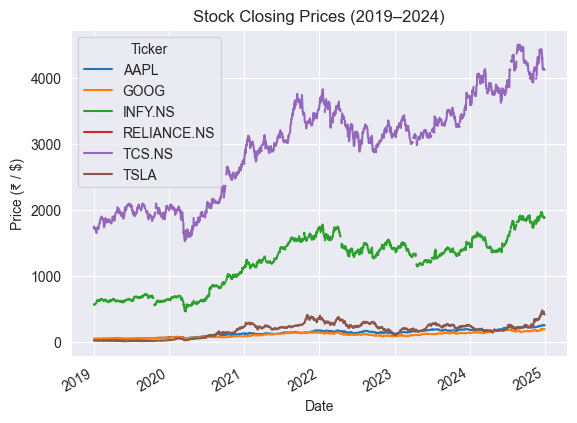

In [5]:
plt.figure(figsize=(14, 7))
stock_data.plot()
plt.title("Stock Closing Prices (2019–2024)")
plt.ylabel("Price (₹ / $)")
plt.xlabel("Date")
plt.legend(title="Ticker")
plt.grid(True)
plt.show()


<Figure size 1400x700 with 0 Axes>

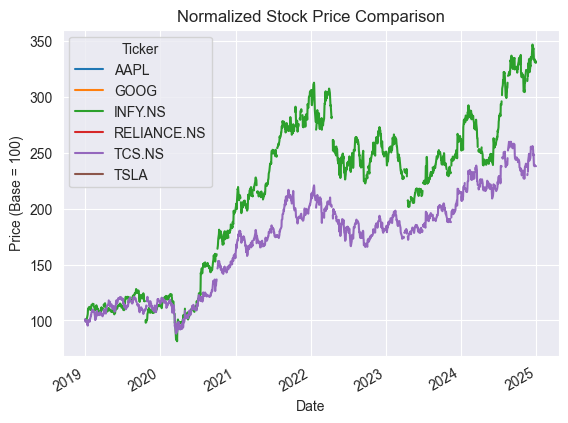

In [6]:
normalized_data = (stock_data / stock_data.iloc[0]) * 100

plt.figure(figsize=(14, 7))
normalized_data.plot()
plt.title("Normalized Stock Price Comparison")
plt.ylabel("Price (Base = 100)")
plt.xlabel("Date")
plt.legend(title="Ticker")
plt.grid(True)
plt.show()


In [7]:
# Daily returns = % change in closing price
daily_returns = stock_data.pct_change()

# Preview
daily_returns.head()


C:\Users\shikh\AppData\Local\Temp\ipykernel_9996\3748740850.py:2: FutureWarning: The default fill_method='pad' in DataFrame.pct_change is deprecated and will be removed in a future version. Either fill in any non-leading NA values prior to calling pct_change or specify 'fill_method=None' to not fill NA values.
  daily_returns = stock_data.pct_change()


Ticker,AAPL,GOOG,INFY.NS,RELIANCE.NS,TCS.NS,TSLA
Date,,,,,,
2019-01-01,NaN,NaN,NaN,NaN,NaN,NaN
2019-01-02,NaN,NaN,0.006015,NaN,0.010774,NaN
2019-01-03,-0.099607,-0.028484,0.000150,NaN,-0.012141,-0.031472
2019-01-04,0.042689,0.053786,-0.012105,NaN,-0.012158,0.057697
2019-01-07,-0.002226,-0.002167,0.016111,NaN,0.011216,0.054361


<Figure size 1400x700 with 0 Axes>

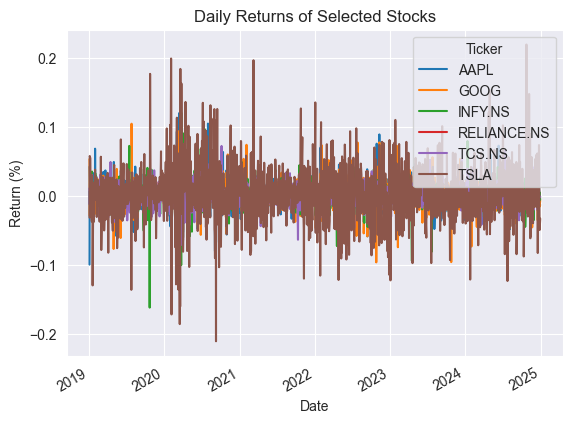

In [8]:
plt.figure(figsize=(14, 7))
daily_returns.plot()
plt.title("Daily Returns of Selected Stocks")
plt.ylabel("Return (%)")
plt.grid(True)
plt.show()


In [9]:
volatility = daily_returns.std()
print("Volatility of Each Stock (Standard Deviation):\n")
print(volatility.sort_values(ascending=False))


Volatility of Each Stock (Standard Deviation):

Ticker
TSLA           0.040031
GOOG           0.019349
AAPL           0.019150
INFY.NS        0.017117
TCS.NS         0.014875
RELIANCE.NS         NaN
dtype: float64


In [ ]:
## # Bar plot for volatility comparison
plt.figure(figsize=(10, 6))
sns.barplot(x=volatility.index, y=volatility.values)
plt.title("Stock Volatility Comparison (2019–2024)")
plt.ylabel("Volatility (Std. Dev. of Daily Returns)")
plt.xlabel("Ticker")
plt.show()


C:\Users\shikh\AppData\Local\Temp\ipykernel_9996\2762283583.py:1: FutureWarning: YF.download() has changed argument auto_adjust default to True
  tcs_data = yf.download('TCS.NS', start='2019-01-01', end='2024-12-31')
[*********************100%***********************]  1 of 1 completed


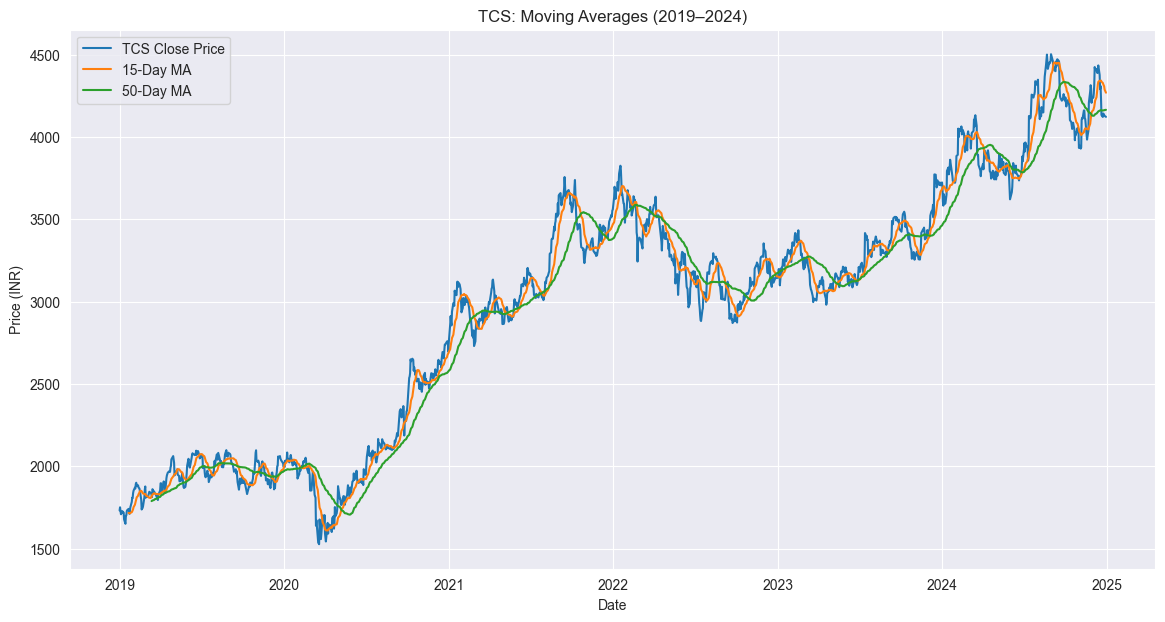

In [10]:
tcs_data = yf.download('TCS.NS', start='2019-01-01', end='2024-12-31')

# Calculate Moving Averages
tcs_data['MA15'] = tcs_data['Close'].rolling(window=15).mean()
tcs_data['MA50'] = tcs_data['Close'].rolling(window=50).mean()

# Plot
plt.figure(figsize=(14, 7))
plt.plot(tcs_data['Close'], label='TCS Close Price')
plt.plot(tcs_data['MA15'], label='15-Day MA')
plt.plot(tcs_data['MA50'], label='50-Day MA')
plt.title("TCS: Moving Averages (2019–2024)")
plt.xlabel("Date")
plt.ylabel("Price (INR)")
plt.legend()
plt.grid(True)
plt.show()


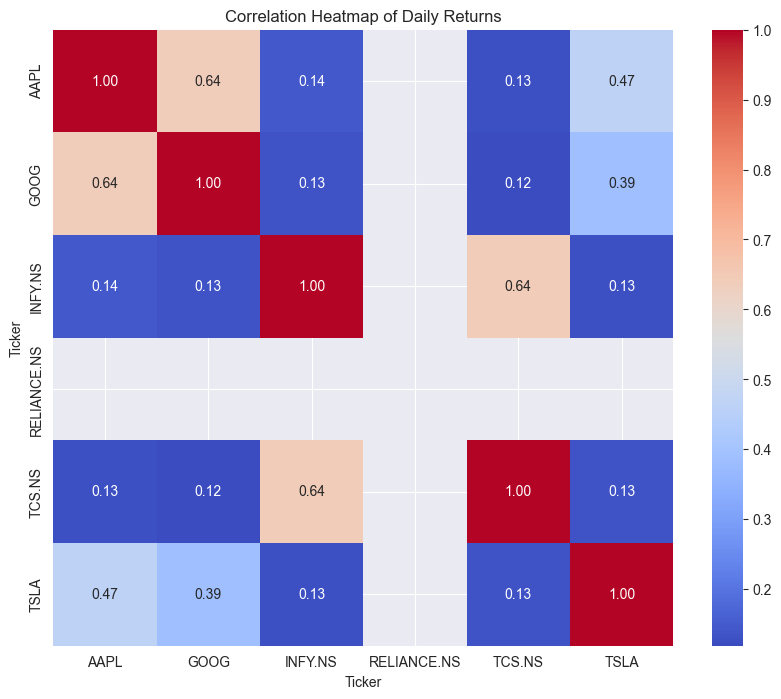

In [11]:
import numpy as np

# Use daily returns for correlation
corr_matrix = daily_returns.corr()

plt.figure(figsize=(10, 8))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt='.2f')
plt.title("Correlation Heatmap of Daily Returns")
plt.show()


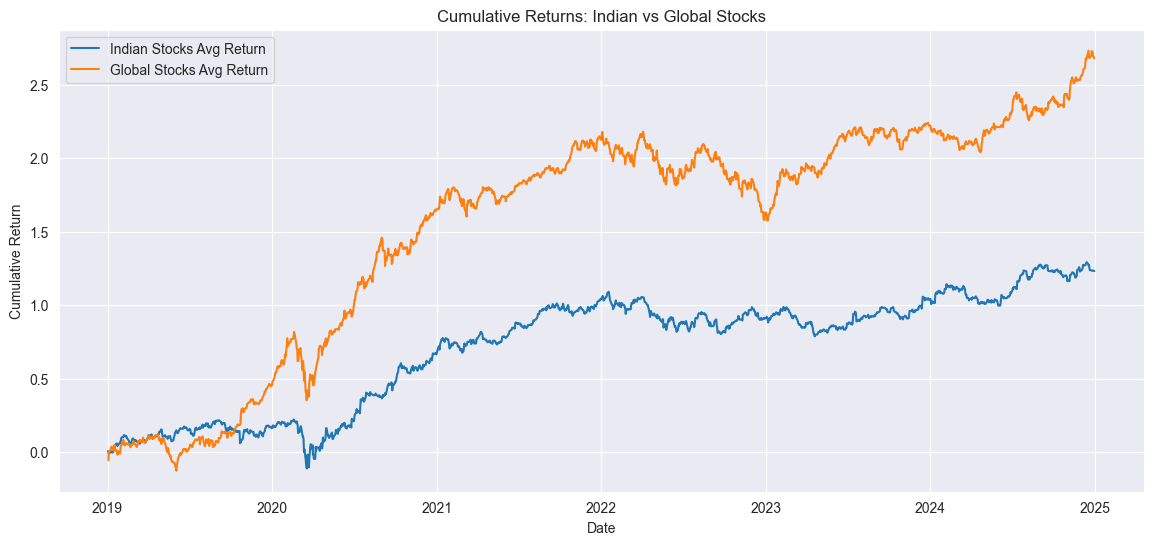

In [12]:
### Compare Indian vs Global Stocks
# Define Indian and Global stocks
indian = ['TCS.NS', 'INFY.NS', 'RELIANCE.NS']
global_ = ['AAPL', 'TSLA', 'GOOG']

# Compute average returns
mean_indian = daily_returns[indian].mean(axis=1)
mean_global = daily_returns[global_].mean(axis=1)

# Plot comparison
plt.figure(figsize=(14, 6))
plt.plot(mean_indian.cumsum(), label="Indian Stocks Avg Return")
plt.plot(mean_global.cumsum(), label="Global Stocks Avg Return")
plt.title("Cumulative Returns: Indian vs Global Stocks")
plt.xlabel("Date")
plt.ylabel("Cumulative Return")
plt.legend()
plt.grid(True)
plt.show()


In [13]:
pip install streamlit



   ---------------------------------------- 0.0/10.1 MB ? eta -:--:--
   ------ --------------------------------- 1.6/10.1 MB 10.5 MB/s eta 0:00:01
   --------------- ------------------------ 3.9/10.1 MB 12.4 MB/s eta 0:00:01
   ------------------- -------------------- 5.0/10.1 MB 10.4 MB/s eta 0:00:01
   ------------------------- -------------- 6.3/10.1 MB 8.0 MB/s eta 0:00:01
   ------------------------------ --------- 7.6/10.1 MB 7.5 MB/s eta 0:00:01
   --------------------------------- ------ 8.4/10.1 MB 7.0 MB/s eta 0:00:01
   ----------------------------------- ---- 8.9/10.1 MB 6.4 MB/s eta 0:00:01
   ------------------------------------ --- 9.2/10.1 MB 5.9 MB/s eta 0:00:01
   -------------------------------------- - 9.7/10.1 MB 5.2 MB/s eta 0:00:01
   ---------------------------------------- 10.1/10.1 MB 4.7 MB/s eta 0:00:00
   ---------------------------------------- 0.0/731.2 kB ? eta -:--:--
   -------------- ------------------------- 262.1/731.2 kB ? eta -:--:--
   --------


[notice] A new release of pip is available: 25.0.1 -> 25.1.1
[notice] To update, run: python.exe -m pip install --upgrade pip


In [14]:
import streamlit as st
import yfinance as yf
import matplotlib.pyplot as plt
import pandas as pd

st.title("📈 Stock Price Dashboard")

tickers = ['TCS.NS', 'INFY.NS', 'RELIANCE.NS', 'TSLA', 'AAPL', 'GOOG']
selected = st.multiselect("Select stocks to plot", tickers, default=['TCS.NS', 'AAPL'])

start = st.date_input("Start date", pd.to_datetime("2020-01-01"))
end = st.date_input("End date", pd.to_datetime("2024-12-31"))

if selected:
    data = yf.download(selected, start=start, end=end)['Close']
    st.line_chart(data)


2025-07-09 13:51:18.587 WARNING streamlit.runtime.scriptrunner_utils.script_run_context: Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2025-07-09 13:51:19.422 
  command:

    streamlit run C:\Users\shikh\AppData\Roaming\Python\Python312\site-packages\ipykernel_launcher.py [ARGUMENTS]
2025-07-09 13:51:19.424 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2025-07-09 13:51:19.424 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2025-07-09 13:51:19.425 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2025-07-09 13:51:19.426 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2025-07-09 13:51:19.426 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2025-07-09 13:51:19.427 Thre

In [17]:
cd C:\Users\shikh\OneDrive\Desktop\Finance and Stock  market analysis


[WinError 2] The system cannot find the file specified: 'C:\\Users\\shikh\\OneDrive\\Desktop\\Finance and Stock market analysis'
c:\Users\shikh\OneDrive\Desktop\Finance and Stock  market analysis


C:\Users\shikh\AppData\Roaming\Python\Python312\site-packages\IPython\core\magics\osm.py:393: UserWarning: This is now an optional IPython functionality, using bookmarks requires you to install the `pickleshare` library.
  bkms = self.shell.db.get('bookmarks', {})
